In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
pwd()

'C:\\Users\\manth\\Documents\\Master Program\\Business Intelligence\\Labs\\Lab3'

In [3]:
df = pd.read_csv('ikea_data.txt',delimiter='\t')

In [4]:
df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [5]:
df.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334262,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058490,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [6]:
df.describe(include=np.object)

,Kommun_name
count,207
unique,207
top,Kävlinge
freq,1


In [7]:
df.Infrast.sum()

10

In [8]:
df["Infrast"].dtype

dtype('int64')

In [9]:
df.Border.sum()

8

In [10]:
df["Border"].dtype

dtype('int64')

In [11]:
df.dtypes

Kommun_code                int64
Year                       int64
Kommun_name               object
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
Infrast                    int64
Border                     int64
dtype: object

In [12]:
df.loc[df["Border"] == 1, "Kommun_name"].value_counts()

Arvika       1
Strömstad    1
Haparanda    1
Torsby       1
Årjäng       1
Eda          1
Tanum        1
Dals-Ed      1
Name: Kommun_name, dtype: int64

In [13]:
df.columns

Index(['Kommun_code', 'Year', 'Kommun_name', 'Revenue', 'Employee',
       'Population', 'Population_University', 'Percent_University',
       'Productivity', 'SalesIndex', 'Infrast', 'Border'],
      dtype='object')

In [14]:
pre = ['Revenue', 'Employee', 'Population', 'Population_University','Percent_University', 'Productivity','SalesIndex','Infrast','Border']

In [15]:
x = df.loc[:, pre].values

In [16]:
y = df.loc[:,['Kommun_name']].values

In [17]:
x = StandardScaler().fit_transform(x)

In [18]:
pd.DataFrame(data = x, columns = pre).head()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,0.017184,-0.169244,-0.366968,-0.274285,-0.639005,3.738817,0.017184,-0.225303,4.987484
1,1.025973,0.752206,0.423730,0.282274,1.015597,0.922074,1.025973,-0.225303,-0.200502
2,1.312392,0.950198,0.767521,0.601858,1.419745,1.010780,1.312392,-0.225303,-0.200502
3,0.124312,0.126716,0.071126,-0.016780,0.369223,0.187793,0.124312,-0.225303,-0.200502
4,-0.320194,-0.290506,-0.066387,-0.056867,0.741587,-0.175330,-0.320194,-0.225303,-0.200502


## PCA Projection to 2D

In [19]:
pca = PCA(.95)

In [20]:
principalComponents = pca.fit_transform(x)

In [21]:
principalDf = pd.DataFrame(data = principalComponents)

In [22]:
pca.n_components_

5

In [23]:
principalDf.head()

,0,1,2,3,4
0,-0.442137,6.220053,-0.046862,-0.486328,0.648428
1,1.748724,0.382760,-1.056933,0.397704,0.103466
2,2.457948,0.387208,-1.303152,0.354918,0.243890
3,0.243091,-0.066118,-0.469815,0.106233,0.049251
4,-0.325750,-0.412781,-0.566916,-0.065218,0.563203


In [24]:
Sum_of_squared = []
K = range(1,25)
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(principalComponents)
    Sum_of_squared.append(model.inertia_)

In [25]:
Sum_of_squared

[1848.161685174609,
 1060.388987096789,
 803.0049367558605,
 590.2256432955387,
 427.7345023608623,
 358.1095103545349,
 298.11332415665305,
 251.4526152020872,
 213.764734757893,
 182.56138847972568,
 156.62337715152574,
 140.71477088712078,
 130.5714093211871,
 116.13387662858055,
 104.89026259508961,
 97.3607090752014,
 87.85054516981295,
 82.19247080851147,
 78.28242832763686,
 71.96423294011923,
 67.68305054153562,
 66.95510021606455,
 63.13869227678516,
 58.75132478420274]

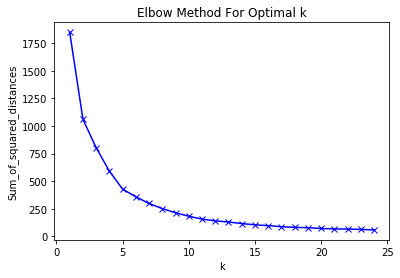

In [26]:
plt.plot(K, Sum_of_squared, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


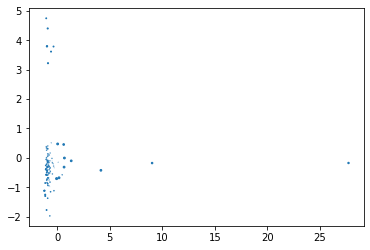

In [27]:
plt.scatter(principalComponents[:,0],principalComponents[:,1],principalComponents[:,2], label='True Position')

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalComponents)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[ 1.78304921e+00,  2.79205915e-01, -1.24369522e+00,
         3.66706525e-01,  4.09982099e-01],
       [-6.07473352e-01, -2.60071708e-01,  1.44869245e-02,
        -5.54371706e-02, -2.21280403e-01],
       [ 2.77200231e+01, -1.76935943e-01,  1.98288515e+00,
        -1.93315146e+00, -2.80484165e+00],
       [ 1.85496882e+00, -1.66360461e-01,  3.10638804e+00,
         2.06735851e+00,  1.85972004e+00],
       [-7.62375135e-01,  4.19635611e+00,  9.47927800e-01,
        -2.46300602e+00,  9.61119679e-01]])

In [30]:
kmeans.labels_

array([4, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 0, 4, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1,
       1, 1, 3, 1, 1, 1, 0, 1, 1])

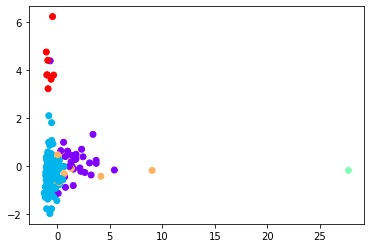

In [31]:
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=kmeans.labels_, cmap='rainbow')

C:\Users\manth\.conda\envs\Business Intelligence\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


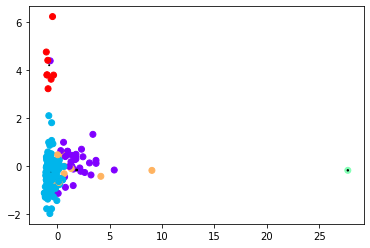

In [32]:
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color='black')

In [33]:
df['clusters'] =kmeans.labels_

In [34]:
pre.extend(['clusters'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
 12  clusters               207 non-null    int32  
dtypes: float64(3), int32(1), int64(8), object(1)
memory usage: 20.3+ KB


In [36]:
df.groupby('clusters').describe()

Kommun_code                                                   \
               count         mean         std     min     25%     50%   
clusters                                                                
0               32.0   826.593750  583.387707   123.0   183.5   730.0   
1              157.0  1056.605096  514.108935   114.0   617.0  1264.0   
2                1.0   180.000000         NaN   180.0   180.0   180.0   
3                9.0  1202.111111  376.138420   481.0  1081.0  1280.0   
4                8.0  1744.750000  370.691150  1435.0  1474.0  1733.5   

                            Year          ... Infrast      Border            \
              75%     max  count    mean  ...     75%  max  count mean  std   
clusters                                  ...                                 
0         1380.50  1880.0   32.0  2010.0  ...     0.0  0.0   32.0  0.0  0.0   
1         1460.00  1882.0  157.0  2010.0  ...     0.0  0.0  157.0  0.0  0.0   
2          180.00   180.0    1.0  2010.0  ...     1.0  1.0    1.0  0.0  NaN   
3         1287.00  1861.0    9.0  2010.0  ...     1.0  1.0    9.0  0.0  0.0   
4         1769.75  2583.0    8.0  2010.0  ...     0.0  0.0    8.0  1.0  0.0   

                                   
          min  25%  50%  75%  max  
clusters                           
0         0.0  0.0  0.0  0.0  0.0  
1         0.0  0.0  0.0  0.0  0.0  
2         0.0  0.0  0.0  0.0  0.0  
3         0.0  0.0  0.0  0.0  0.0  
4         1.0  1.0  1.0  1.0  1.0  

[5 rows x 88 columns]

In [37]:
df

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,4
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,1
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1863,2010,Hällefors,52,33,7220,368,0.050970,78.97019,5.358015,0,0,1
203,1864,2010,Ljusnarsberg,51,24,4931,266,0.053944,106.49585,5.254976,0,0,1
204,1880,2010,Örebro,6228,2995,135460,19516,0.144072,104.21387,641.725346,0,0,0
205,1881,2010,Kumla,152,98,20456,1598,0.078119,77.73047,15.661890,0,0,1


In [38]:
df.groupby(['Kommun_name','Infrast']).groups

{('Ale', 0): Int64Index([146], dtype='int64'),
 ('Alingsås', 0): Int64Index([172], dtype='int64'),
 ('Alvesta', 0): Int64Index([74], dtype='int64'),
 ('Aneby', 0): Int64Index([58], dtype='int64'),
 ('Arvika', 0): Int64Index([196], dtype='int64'),
 ('Askersund', 0): Int64Index([206], dtype='int64'),
 ('Bengtsfors', 0): Int64Index([155], dtype='int64'),
 ('Bjuv', 0): Int64Index([102], dtype='int64'),
 ('Bollebygd', 0): Int64Index([149], dtype='int64'),
 ('Borgholm', 0): Int64Index([89], dtype='int64'),
 ('Borås', 0): Int64Index([173], dtype='int64'),
 ('Botkyrka', 0): Int64Index([10], dtype='int64'),
 ('Boxholm', 0): Int64Index([48], dtype='int64'),
 ('Bromölla', 0): Int64Index([111], dtype='int64'),
 ('Burlöv', 0): Int64Index([98], dtype='int64'),
 ('Båstad', 0): Int64Index([116], dtype='int64'),
 ('Dals-Ed', 0): Int64Index([144], dtype='int64'),
 ('Danderyd', 0): Int64Index([17], dtype='int64'),
 ('Degerfors', 0): Int64Index([201], dtype='int64'),
 ('Eda', 0): Int64Index([184], dtype='

In [39]:
df["clusters"].value_counts()

1    157
0     32
3      9
4      8
2      1
Name: clusters, dtype: int64

In [40]:
locations =['Borlänge', 'Gävle', 'Göteborg', 'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö', 'Stockholm', 'Sundsvall', 'Uddevalla', 'Umeå', 'Uppsala', 'Västerås', 'Älmhult', 'Örebro']

In [41]:
check_existing_ikea = ["Borlänge", "Gävle", "Göteborg", "Haparanda", "Helsingborg", "Jönköping", "Kalmar", "Karlstad", 
                       "Linköping", "Malmö", "Stockholm", "Sundsvall", "Uddevalla", "Umeå", "Uppsala", "Västerås", 
                       "Älmhult", "Örebro"]
result = {elem : True if elem in df.Kommun_name.values else False for elem in check_existing_ikea}.values()
print(result)

dict_values([False, False, False, True, True, True, True, True, True, True, True, False, True, False, True, False, True, True])


In [42]:
existing_ikea_in_dataframe=["Haparanda", "Helsingborg", "Jönköping", "Kalmar", "Karlstad", "Linköping", "Malmö",
                            "Stockholm", "Uddevalla","Uppsala","Älmhult", "Örebro"]

In [43]:
df[['Revenue','Employee','Population','Population_University','Percent_University','Productivity','SalesIndex',
         'clusters']].groupby('clusters').mean()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex
clusters,,,,,,,
0,3169.656250,1417.281250,79523.156250,12284.218750,0.152886,116.641545,326.597424
1,343.369427,197.535032,19330.566879,1828.464968,0.086320,85.058432,35.380357
2,32897.000000,18795.000000,847073.000000,191585.000000,0.226173,87.717800,3389.665819
3,2317.222222,1228.333333,69779.333333,9496.111111,0.102181,96.075086,238.763685
4,561.625000,256.625000,11969.500000,928.500000,0.073015,111.485212,57.869139


In [44]:
df[(df["Kommun_name"]=="Haparanda")|
    (df["Kommun_name"]=="Helsingborg")|
    (df["Kommun_name"]=="Jönköping")|
    (df["Kommun_name"]=="Kalmar")|
    (df["Kommun_name"]=="Karlstad")|
    (df["Kommun_name"]=="Linköping")|
    (df["Kommun_name"]=="Malmö")|
    (df["Kommun_name"]=="Stockholm")|
    (df["Kommun_name"]=="Uddevalla")|
    (df["Kommun_name"]=="Uppsala")|
    (df["Kommun_name"]=="Älmhult")|
    (df["Kommun_name"]=="Örebro")]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,4
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0
19,180,2010,Stockholm,32897,18795,847073,191585,0.226173,87.71780,3389.665819,1,0,2
33,380,2010,Uppsala,7042,3391,197787,40476,0.204644,104.07394,725.598890,0,0,0
52,580,2010,Linköping,5348,2280,146416,26023,0.177733,117.55208,551.051245,0,0,0
64,680,2010,Jönköping,5298,2556,127382,16750,0.131494,103.87831,545.899307,0,0,0
75,765,2010,Älmhult,847,853,15603,1511,0.096840,49.76318,87.273823,0,0,1
117,1280,2010,Malmö,11217,5740,298963,50084,0.167526,97.93515,1155.785679,1,0,3
120,1283,2010,Helsingborg,5528,3244,129177,16395,0.126919,85.40061,569.598220,1,0,3


In [45]:
#configure Pandas to display all 23 columns
pd.set_option("display.max.rows", None)
#show only two decimal places
pd.set_option("display.precision", 2)

In [46]:
df[df["clusters"] == 0]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
1,880,2010,Kalmar,3790,1621,62815,8716,0.14,117.17,390.52,0,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.16,119.65,469.86,0,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.14,128.21,527.46,0,0,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.13,151.00,737.04,0,0,0
10,127,2010,Botkyrka,1469,530,82608,8023,0.10,138.91,151.36,0,0,0
16,160,2010,Täby,3441,1546,63789,13442,0.21,111.54,354.56,0,0,0
17,162,2010,Danderyd,500,272,31330,8448,0.27,92.12,51.52,0,0,0
18,163,2010,Sollentuna,2393,1116,64630,12322,0.19,107.46,246.57,0,0,0
20,181,2010,Södertälje,2191,894,86246,8734,0.10,122.82,225.76,0,0,0
21,182,2010,Nacka,3104,1489,90108,17871,0.20,104.47,319.83,0,0,0


In [47]:
df.loc[df["clusters"] == 0, "clusters"].value_counts()

0    32
Name: clusters, dtype: int64

In [48]:
df[df["clusters"] == 1]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.11,96.69,140.75,0,0,1
4,115,2010,Vallentuna,171,99,30114,3843,0.13,86.56,17.62,0,0,1
5,117,2010,Österåker,563,314,39521,5011,0.13,89.86,58.01,0,0,1
6,120,2010,Värmdö,920,454,38301,4720,0.12,101.56,94.80,0,0,1
8,125,2010,Ekerö,144,116,25410,3893,0.15,62.21,14.84,0,0,1
11,128,2010,Salem,27,68,15391,1900,0.12,19.90,2.78,0,0,1
12,136,2010,Haninge,1459,1031,77054,6776,0.09,70.92,150.33,0,0,1
13,138,2010,Tyresö,480,290,42947,5219,0.12,82.95,49.46,0,0,1
14,139,2010,Upplands-Bro,222,80,23676,2520,0.11,139.07,22.87,0,0,1
15,140,2010,Nykvarn,16,20,9331,891,0.10,40.09,1.65,0,0,1


In [49]:
df.loc[df["clusters"] == 1, "clusters"].value_counts()

1    157
Name: clusters, dtype: int64

In [50]:
df[df["clusters"] == 2]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
19,180,2010,Stockholm,32897,18795,847073,191585,0.23,87.72,3389.67,1,0,2


In [51]:
df[df["clusters"] == 3]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
39,481,2010,Oxelösund,106,76,11193,787,0.07,69.90,10.92,1,0,3
90,980,2010,Gotland,1542,767,57269,6203,0.11,100.75,158.89,1,0,3
93,1081,2010,Ronneby,646,262,28254,2813,0.10,123.57,66.56,1,0,3
94,1082,2010,Karlshamn,762,420,31143,3093,0.10,90.92,78.52,1,0,3
117,1280,2010,Malmö,11217,5740,298963,50084,0.17,97.94,1155.79,1,0,3
120,1283,2010,Helsingborg,5528,3244,129177,16395,0.13,85.40,569.60,1,0,3
124,1287,2010,Trelleborg,748,367,42219,3725,0.09,102.14,77.07,1,0,3
167,1484,2010,Lysekil,204,136,14521,1359,0.09,75.17,21.02,1,0,3
200,1861,2010,Hallsberg,102,43,15275,1006,0.07,118.88,10.51,1,0,3


In [52]:
df[df["clusters"] == 4]

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,clusters
0,2583,2010,Haparanda,1078,276,10059,719,0.07,195.74,111.08,0,1,4
143,1435,2010,Tanum,254,173,12370,1097,0.09,73.58,26.17,0,1,4
144,1438,2010,Dals-Ed,112,42,4692,301,0.06,133.64,11.54,0,1,4
169,1486,2010,Strömstad,1281,667,11808,1071,0.09,96.25,131.99,0,1,4
184,1730,2010,Eda,626,271,8524,426,0.05,115.77,64.50,0,1,4
185,1737,2010,Torsby,194,103,12414,866,0.07,94.39,19.99,0,1,4
191,1765,2010,Årjäng,439,239,9855,573,0.06,92.05,45.23,0,1,4
196,1784,2010,Arvika,509,282,26034,2375,0.09,90.46,52.45,0,1,4
